In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# EDA and Graphs of Results

In [2]:
# Ensures that tweet and user ids do not appear in scientific notation
# pd.options.display.float_format = '{:.0f}'.format

In [3]:
sns.set_theme()

In [4]:
languages_data = ['german', 'spanish', 'italian', 'dutch']

In [5]:
filepath = '../NLP_MBTI_Classification/results_summary/'

In [6]:
def df_bar_plotting(df, data_type='Train'):
    df = df[df['Data'] == data_type]
    df = df[['At Least 1 Match', 
             'At Least 2 Matches', 
             'At Least 3 Matches', 
             'Perfect Match', 
             'Average Match']].T
    df = df.reset_index() 
    df.columns = ['Metrics', 'CNN', 'BERT']
    
    # CNN Set
    df_cnn = df[['Metrics', 'CNN']]
    df_cnn.columns = ['Metrics', 'Percent']
    df_cnn['Model'] = 'CNN'
    df_cnn
    
    # BERT Set
    df_bert = df[['Metrics', 'BERT']]
    df_bert.columns = ['Metrics', 'Percent']
    df_bert['Model'] = 'BERT'
    df_bert
    
    return pd.concat([df_cnn, df_bert])

In [7]:
def catplotting(df): 
    df_train = df_bar_plotting(df, data_type='Train')
    df_train['Data'] = 'Train'

    df_test = df_bar_plotting(df, data_type='Test')
    df_test['Data'] = 'Test'

    df_metric_summary = pd.concat([df_train, df_test])
    
    g = sns.catplot(x="Model", y="Percent", hue="Metrics", col="Data", kind="point",
                   data=df_metric_summary)
    g.set(ylim=(0, 105));

## CNN vs BERT

### German

In [8]:
german = pd.concat([
    pd.read_csv(filepath+'cnn_german_summary.csv', index_col=0), 
    pd.read_csv(filepath+'bert_german_summary.csv', index_col=0)
]).reset_index(drop=True) 

german

,Data,Language,Model,Number of Samples,At Least 1 Match,At Least 2 Matches,At Least 3 Matches,Perfect Match,Average Match
0,Train,German,CNN,20000,100.0,71.04,35.76,18.00,47.56
1,Test,German,CNN,5000,100.0,69.76,32.02,13.86,45.07
2,Train,German,BERT-Base-German-Cased,20000,100.0,97.71,85.61,71.66,88.68
3,Test,German,BERT-Base-German-Cased,5000,100.0,87.70,58.98,32.66,68.34


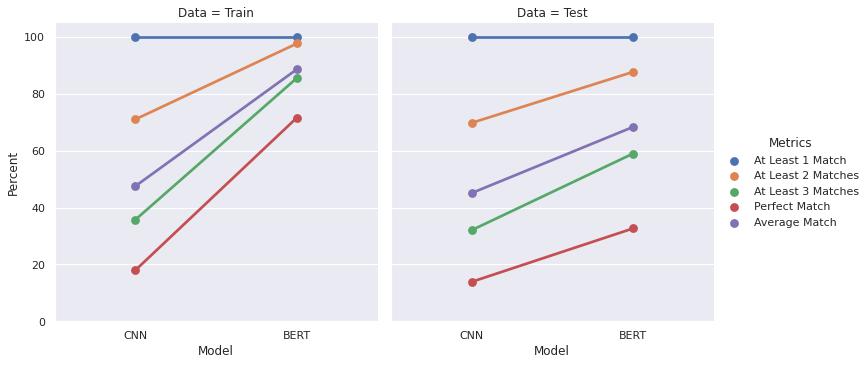

In [9]:
catplotting(german);

### Spanish

In [10]:
spanish = pd.concat([
    pd.read_csv(filepath+'cnn_spanish_summary.csv', index_col=0), 
    pd.read_csv(filepath+'bert_spanish_summary.csv', index_col=0)
]).reset_index(drop=True) 

spanish

,Data,Language,Model,Number of Samples,At Least 1 Match,At Least 2 Matches,At Least 3 Matches,Perfect Match,Average Match
0,Train,Spanish,CNN,20000,100.0,77.44,43.06,19.58,55.05
1,Test,Spanish,CNN,5000,100.0,72.68,34.74,12.36,48.48
2,Train,Spanish,BERT-Base-Spanish-Cased,20000,100.0,86.00,59.04,35.25,67.40
3,Test,Spanish,BERT-Base-Spanish-Cased,5000,100.0,77.48,40.64,13.22,52.72


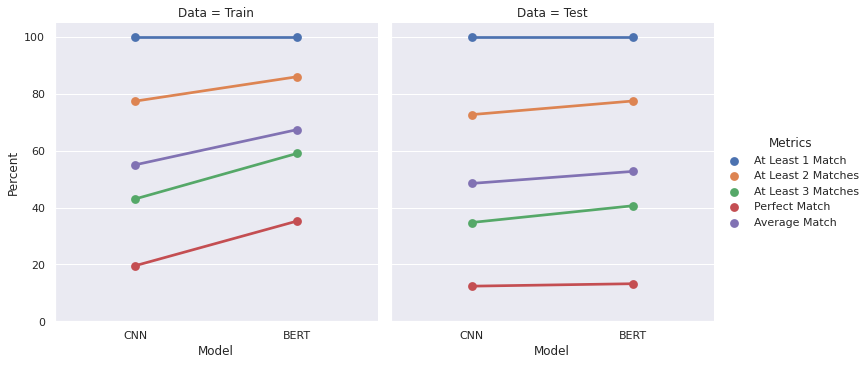

In [11]:
catplotting(spanish);

### Italian

In [12]:
italian = pd.concat([
    pd.read_csv(filepath+'cnn_italian_summary.csv', index_col=0), 
    pd.read_csv(filepath+'bert_italian_summary.csv', index_col=0)
]).reset_index(drop=True) 

italian

,Data,Language,Model,Number of Samples,At Least 1 Match,At Least 2 Matches,At Least 3 Matches,Perfect Match,Average Match
0,Train,Italian,CNN,20000,100.0,75.72,38.20,15.83,52.60
1,Test,Italian,CNN,5000,100.0,74.52,33.88,11.42,50.42
2,Train,Italian,BERT-Base-Italian-Cased,20000,100.0,91.70,65.14,40.63,73.31
3,Test,Italian,BERT-Base-Italian-Cased,5000,100.0,85.10,51.28,22.20,62.12


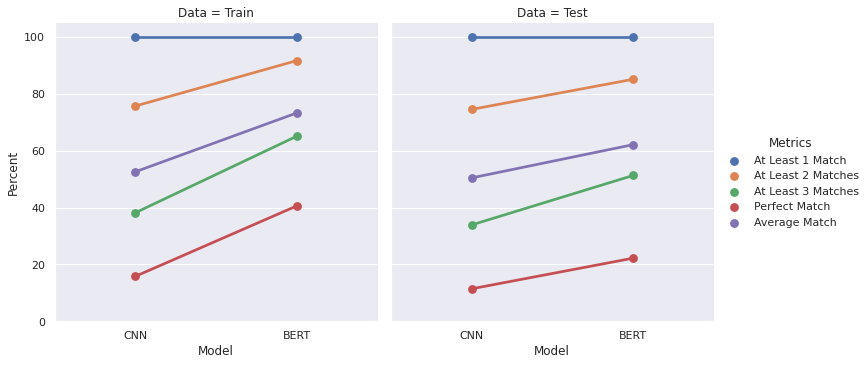

In [13]:
g = catplotting(italian);

### Dutch

In [14]:
dutch = pd.concat([
    pd.read_csv(filepath+'cnn_dutch_summary.csv', index_col=0), 
    pd.read_csv(filepath+'bert_dutch_summary.csv', index_col=0)
]).reset_index(drop=True) 

dutch

,Data,Language,Model,Number of Samples,At Least 1 Match,At Least 2 Matches,At Least 3 Matches,Perfect Match,Average Match
0,Train,Dutch,CNN,20000,100.0,73.56,33.07,14.00,49.06
1,Test,Dutch,CNN,5000,100.0,71.72,30.46,11.02,46.96
2,Train,Dutch,BERT-Base-Dutch-Cased,20000,100.0,93.08,69.11,47.91,77.00
3,Test,Dutch,BERT-Base-Dutch-Cased,5000,100.0,85.14,50.54,22.52,62.17


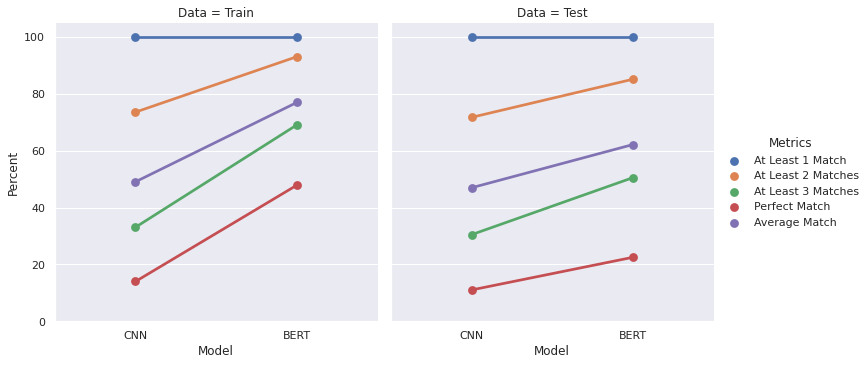

In [15]:
catplotting(dutch)

## Summarize all Monolingual Models

In [16]:
monolingual = pd.concat([spanish, german, dutch, italian])
monolingual

,Data,Language,Model,Number of Samples,At Least 1 Match,At Least 2 Matches,At Least 3 Matches,Perfect Match,Average Match
0,Train,Spanish,CNN,20000,100.0,77.44,43.06,19.58,55.05
1,Test,Spanish,CNN,5000,100.0,72.68,34.74,12.36,48.48
2,Train,Spanish,BERT-Base-Spanish-Cased,20000,100.0,86.00,59.04,35.25,67.40
3,Test,Spanish,BERT-Base-Spanish-Cased,5000,100.0,77.48,40.64,13.22,52.72
0,Train,German,CNN,20000,100.0,71.04,35.76,18.00,47.56
1,Test,German,CNN,5000,100.0,69.76,32.02,13.86,45.07
2,Train,German,BERT-Base-German-Cased,20000,100.0,97.71,85.61,71.66,88.68
3,Test,German,BERT-Base-German-Cased,5000,100.0,87.70,58.98,32.66,68.34
0,Train,Dutch,CNN,20000,100.0,73.56,33.07,14.00,49.06
1,Test,Dutch,CNN,5000,100.0,71.72,30.46,11.02,46.96


In [17]:
cnn = monolingual[monolingual['Model'] == 'CNN']
cnn_train = cnn[cnn['Data'] == 'Train']
cnn_train_mean = np.mean(cnn_train)
cnn_train_mean

Number of Samples     20000.0000
At Least 1 Match        100.0000
At Least 2 Matches       74.4400
At Least 3 Matches       37.5225
Perfect Match            16.8525
Average Match            51.0675
dtype: float64

In [18]:
cnn = monolingual[monolingual['Model'] == 'CNN']
cnn_test = cnn[cnn['Data'] == 'Test']
cnn_test_mean = np.mean(cnn_test)
cnn_test_mean

Number of Samples     5000.0000
At Least 1 Match       100.0000
At Least 2 Matches      72.1700
At Least 3 Matches      32.7750
Perfect Match           12.1650
Average Match           47.7325
dtype: float64

In [19]:
bert = monolingual[monolingual['Model'] != 'CNN']
bert_train = bert[bert['Data'] == 'Train']
bert_train_mean = np.mean(bert_train)
bert_train_mean

Number of Samples     20000.0000
At Least 1 Match        100.0000
At Least 2 Matches       92.1225
At Least 3 Matches       69.7250
Perfect Match            48.8625
Average Match            76.5975
dtype: float64

In [20]:
bert = monolingual[monolingual['Model'] != 'CNN']
bert_test = bert[bert['Data'] == 'Test']
bert_test_mean = np.mean(bert_test)
bert_test_mean

Number of Samples     5000.0000
At Least 1 Match       100.0000
At Least 2 Matches      83.8550
At Least 3 Matches      50.3600
Perfect Match           22.6500
Average Match           61.3375
dtype: float64

In [21]:
summary_mean = pd.concat([pd.DataFrame(cnn_train_mean).T,
           pd.DataFrame(cnn_test_mean).T,
           pd.DataFrame(bert_train_mean).T,
           pd.DataFrame(bert_test_mean).T])
summary_mean['Model'] = ['CNN', 'CNN', 'BERT', 'BERT']
summary_mean['Data'] = ['Train', 'Test', 'Train', 'Test']
summary_mean = summary_mean[['Model', 'Data', 'Number of Samples', 'At Least 1 Match', 'At Least 2 Matches', 'At Least 3 Matches', 'Perfect Match', 'Average Match']]
summary_mean = summary_mean.round(1)
summary_mean

,Model,Data,Number of Samples,At Least 1 Match,At Least 2 Matches,At Least 3 Matches,Perfect Match,Average Match
0,CNN,Train,20000.0,100.0,74.4,37.5,16.9,51.1
0,CNN,Test,5000.0,100.0,72.2,32.8,12.2,47.7
0,BERT,Train,20000.0,100.0,92.1,69.7,48.9,76.6
0,BERT,Test,5000.0,100.0,83.9,50.4,22.6,61.3


In [22]:
summary_mean.to_csv(filepath+'summary_average_results.csv')

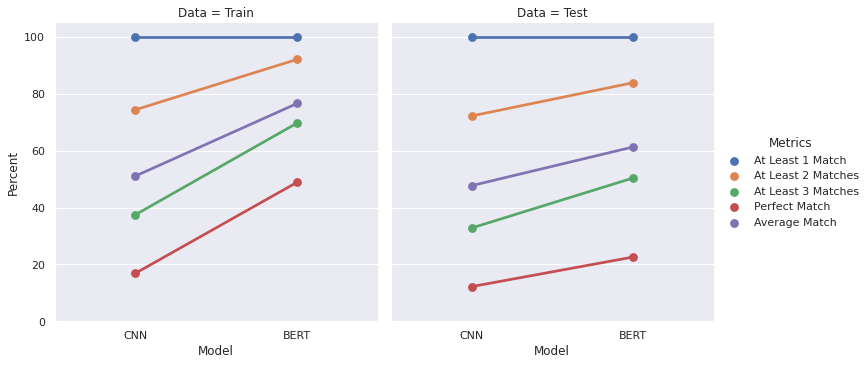

In [23]:
summary_catplot = catplotting(summary_mean)
plt.savefig(filepath+'summary_average_results_catplot.png')

In [24]:
avg_bert_improvement_train = bert_train_mean - cnn_train_mean
avg_bert_improvement_train

Number of Samples      0.0000
At Least 1 Match       0.0000
At Least 2 Matches    17.6825
At Least 3 Matches    32.2025
Perfect Match         32.0100
Average Match         25.5300
dtype: float64

In [25]:
avg_bert_improvement_test = bert_test_mean - cnn_test_mean
avg_bert_improvement_test

Number of Samples      0.000
At Least 1 Match       0.000
At Least 2 Matches    11.685
At Least 3 Matches    17.585
Perfect Match         10.485
Average Match         13.605
dtype: float64

In [26]:
avg_bert_improvement_train_rounded = np.round(np.array(avg_bert_improvement_train)[1:], 1)
avg_bert_improvement_test_rounded = np.round(np.array(avg_bert_improvement_test)[1:], 1)

In [27]:
avg_bert_improvement_train = np.append(['Monolingual', 'Train'], 
                                       avg_bert_improvement_train_rounded)

avg_bert_improvement_test = np.append(['Monolingual', 'Test'], 
                                      avg_bert_improvement_test_rounded)

In [28]:
monolingal_improvement = np.vstack((avg_bert_improvement_train, avg_bert_improvement_test))
df_monolingal_improvement = pd.DataFrame(monolingal_improvement, columns=['Model', 'Data', 'At Least 1 Match', 'At Least 2 Matches', 'At Least 3 Matches', 'Perfect Match', 'Average Match'])
df_monolingal_improvement

,Model,Data,At Least 1 Match,At Least 2 Matches,At Least 3 Matches,Perfect Match,Average Match
0,Monolingual,Train,0.0,17.7,32.2,32.0,25.5
1,Monolingual,Test,0.0,11.7,17.6,10.5,13.6


### Multilingual

In [29]:
multilingual = pd.concat([
    pd.read_csv(filepath+'cnn_all_summary.csv', index_col=0), 
    pd.read_csv(filepath+'bert_all_summary.csv', index_col=0)
]).reset_index(drop=True) 

multilingual

,Data,Language,Model,Number of Samples,At Least 1 Match,At Least 2 Matches,At Least 3 Matches,Perfect Match,Average Match
0,Train,All,CNN,80000,100.0,76.19,40.12,17.99,52.52
1,Test,All,CNN,20000,100.0,74.63,36.33,13.30,49.65
2,Train,All,BERT-Base-Multilingual-Cased,80000,100.0,91.25,69.07,45.66,74.87
3,Test,All,BERT-Base-Multilingual-Cased,20000,100.0,85.26,53.89,25.50,63.08


In [54]:
summary_multilingual = multilingual.copy()
summary_multilingual = summary_multilingual.drop(columns=['Language', 'Model'])
summary_multilingual.insert(0, 'Model', ['CNN', 'CNN', 'BERT', 'BERT'])
summary_multilingual

,Model,Data,Number of Samples,At Least 1 Match,At Least 2 Matches,At Least 3 Matches,Perfect Match,Average Match
0,CNN,Train,80000,100.0,76.19,40.12,17.99,52.52
1,CNN,Test,20000,100.0,74.63,36.33,13.30,49.65
2,BERT,Train,80000,100.0,91.25,69.07,45.66,74.87
3,BERT,Test,20000,100.0,85.26,53.89,25.50,63.08


In [55]:
summary_multilingual.to_csv(filepath+'summary_multilingual_results.csv')

In [31]:
avg_bert_multilingual_improvement_test = multilingual[(multilingual['Model'] != 'CNN') & (multilingual['Data'] == 'Test')].iloc[0, 4:] - multilingual[(multilingual['Model'] == 'CNN') & (multilingual['Data'] == 'Test')].iloc[0, 4:]
avg_bert_multilingual_improvement_test

At Least 1 Match          0
At Least 2 Matches    10.63
At Least 3 Matches    17.56
Perfect Match          12.2
Average Match         13.43
dtype: object

In [32]:
avg_bert_multilingual_improvement_train_round = np.round(np.array(avg_bert_multilingual_improvement_train, dtype=np.float32), 1)
avg_bert_multilingual_improvement_test_round = np.round(np.array(avg_bert_multilingual_improvement_test, dtype=np.float32), 1)

In [33]:
avg_bert_multilingual_improvement_train = np.append(['Multilingual', 'Train'], avg_bert_multilingual_improvement_train_round)
avg_bert_multilingual_improvement_test = np.append(['Multilingual', 'Test'], avg_bert_multilingual_improvement_test_round)

In [34]:
multilingual_improvement = pd.DataFrame(np.vstack((avg_bert_multilingual_improvement_train, avg_bert_multilingual_improvement_test)),
            columns=['Model', 'Data', 'At Least 1 Match', 'At Least 2 Matches', 'At Least 3 Matches', 'Perfect Match', 'Average Match'])

In [35]:
improvement_table = df_monolingal_improvement.copy()
improvement_table = improvement_table.append(multilingual_improvement).reset_index(drop=True) 
improvement_table

,Model,Data,At Least 1 Match,At Least 2 Matches,At Least 3 Matches,Perfect Match,Average Match
0,Monolingual,Train,0.0,17.7,32.2,32.0,25.5
1,Monolingual,Test,0.0,11.7,17.6,10.5,13.6
2,Multilingual,Train,0.0,15.1,29.0,27.7,22.4
3,Multilingual,Test,0.0,10.6,17.6,12.2,13.4


In [36]:
improvement_table.to_csv(filepath+'summary_improvement.csv')

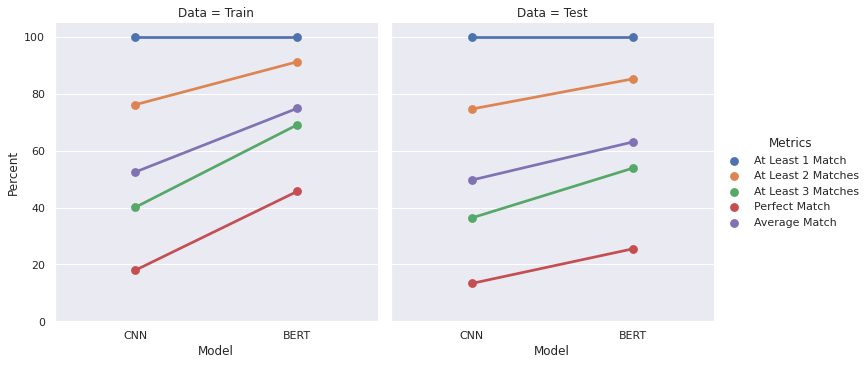

In [37]:
g = catplotting(multilingual)

#g.set_titles("{col_name} {col_var}");
#g.fig.subplots_adjust(top=0.9)
#plt.title('ONE TITLE FOR ALL1')
#plt.title('ONE TITLE FOR ALL')

In [38]:
multilingual_train = df_bar_plotting(multilingual, data_type='Train')
multilingual_train['Data'] = 'Train' 
multilingual_train

,Metrics,Percent,Model,Data
0,At Least 1 Match,100.00,CNN,Train
1,At Least 2 Matches,76.19,CNN,Train
2,At Least 3 Matches,40.12,CNN,Train
3,Perfect Match,17.99,CNN,Train
4,Average Match,52.52,CNN,Train
0,At Least 1 Match,100.00,BERT,Train
1,At Least 2 Matches,91.25,BERT,Train
2,At Least 3 Matches,69.07,BERT,Train
3,Perfect Match,45.66,BERT,Train
4,Average Match,74.87,BERT,Train


In [39]:
multilingual_test = df_bar_plotting(multilingual, data_type='Test')
multilingual_test['Data'] = 'Test' 
multilingual_test

,Metrics,Percent,Model,Data
0,At Least 1 Match,100.00,CNN,Test
1,At Least 2 Matches,74.63,CNN,Test
2,At Least 3 Matches,36.33,CNN,Test
3,Perfect Match,13.30,CNN,Test
4,Average Match,49.65,CNN,Test
0,At Least 1 Match,100.00,BERT,Test
1,At Least 2 Matches,85.26,BERT,Test
2,At Least 3 Matches,53.89,BERT,Test
3,Perfect Match,25.50,BERT,Test
4,Average Match,63.08,BERT,Test


In [40]:
multilingual_metric_summary = pd.concat([multilingual_train, multilingual_test])
multilingual_metric_summary

,Metrics,Percent,Model,Data
0,At Least 1 Match,100.00,CNN,Train
1,At Least 2 Matches,76.19,CNN,Train
2,At Least 3 Matches,40.12,CNN,Train
3,Perfect Match,17.99,CNN,Train
4,Average Match,52.52,CNN,Train
0,At Least 1 Match,100.00,BERT,Train
1,At Least 2 Matches,91.25,BERT,Train
2,At Least 3 Matches,69.07,BERT,Train
3,Perfect Match,45.66,BERT,Train
4,Average Match,74.87,BERT,Train


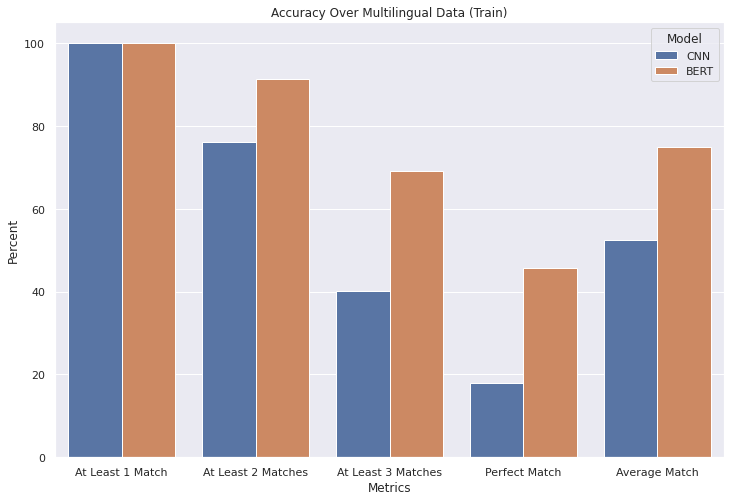

In [41]:
plt.figure(figsize=(12,8))
plt.title('Accuracy Over Multilingual Data (Train)')
sns.barplot(data=multilingual_train, x = "Metrics", y = "Percent", hue="Model");

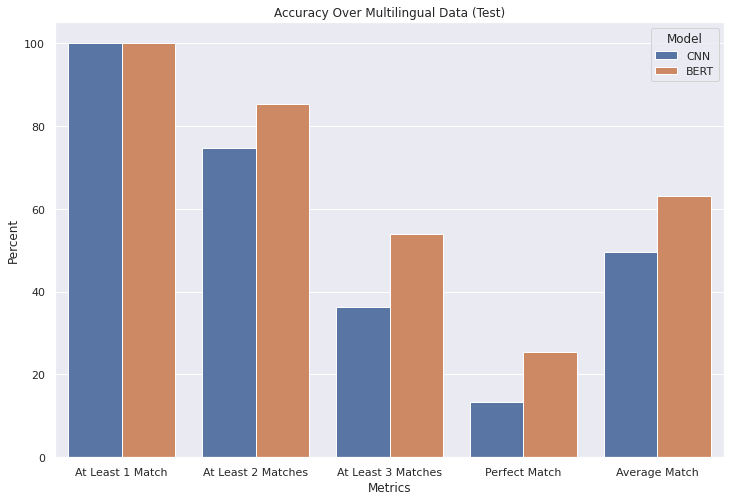

In [42]:
plt.figure(figsize=(12,8))
plt.title('Accuracy Over Multilingual Data (Test)')
sns.barplot(data=multilingual_test, x = "Metrics", y = "Percent", hue="Model");

## Training Size Variation

In [43]:
bert = pd.read_csv(filepath+'bert_train_size_variation.csv', index_col=0)
bert = bert.rename(columns={"One Match": "At Least 1 Match", 
                            "Two Matches": "At Least 2 Matches",
                           "Three Matches": "At Least 3 Matches",
                           "Number of Samples": "Number of Training Samples"})
bert['Model'] = 'BERT'
bert

,At Least 1 Match,At Least 2 Matches,At Least 3 Matches,Perfect Match,Average Match,Data,Number of Training Samples,Model
0,100.0,81.99,50.13,25.31,60.14,Train,16000,BERT
1,100.0,86.21,56.71,31.56,65.84,Train,32000,BERT
0,100.0,78.72,42.77,16.26,54.42,Test,16000,BERT
1,100.0,81.11,45.66,18.36,57.22,Test,32000,BERT
0,100.0,88.86,62.59,38.78,70.39,Train,48000,BERT
1,100.0,82.93,50.42,22.22,60.50,Test,48000,BERT
0,100.0,90.66,66.46,42.28,73.27,Train,64000,BERT
1,100.0,84.24,50.94,22.80,61.78,Test,64000,BERT
0,100.0,91.72,70.28,48.47,75.99,Train,80000,BERT
1,100.0,84.92,53.10,25.56,63.00,Test,80000,BERT


In [44]:
cnn_train = pd.read_csv(filepath+'cnn_sample_size_var_train.csv', index_col=0)
cnn_train['Data'] = 'Train'

cnn_test = pd.read_csv(filepath+'cnn_sample_size_var_test.csv', index_col=0)
cnn_test['Data'] = 'Test'

cnn = pd.concat([cnn_train, cnn_test])
cnn = cnn[['At Least 1 Match', 'At Least 2 Matches', 'At Least 3 Matches', 'Perfect Match', 'Average Match', 'Data', 'Number of Training Samples']]
cnn['Model'] = 'CNN'
cnn

,At Least 1 Match,At Least 2 Matches,At Least 3 Matches,Perfect Match,Average Match,Data,Number of Training Samples,Model
0,100.0,77.48,43.96,22.61,54.78,Train,16000.0,CNN
1,100.0,76.93,41.41,18.14,53.39,Train,32000.0,CNN
2,100.0,77.44,41.00,17.58,53.66,Train,48000.0,CNN
3,100.0,77.85,41.72,17.69,54.24,Train,64000.0,CNN
4,100.0,76.55,41.53,18.06,53.09,Train,80000.0,CNN
0,100.0,73.82,36.98,13.60,49.38,Test,16000.0,CNN
1,100.0,74.41,36.28,12.67,49.70,Test,32000.0,CNN
2,100.0,75.00,35.63,12.28,49.96,Test,48000.0,CNN
3,100.0,76.53,38.15,13.44,51.62,Test,64000.0,CNN
4,100.0,74.00,36.85,14.22,49.98,Test,80000.0,CNN


In [45]:
train_var = pd.concat([bert, cnn])
train_var

,At Least 1 Match,At Least 2 Matches,At Least 3 Matches,Perfect Match,Average Match,Data,Number of Training Samples,Model
0,100.0,81.99,50.13,25.31,60.14,Train,16000.0,BERT
1,100.0,86.21,56.71,31.56,65.84,Train,32000.0,BERT
0,100.0,78.72,42.77,16.26,54.42,Test,16000.0,BERT
1,100.0,81.11,45.66,18.36,57.22,Test,32000.0,BERT
0,100.0,88.86,62.59,38.78,70.39,Train,48000.0,BERT
1,100.0,82.93,50.42,22.22,60.50,Test,48000.0,BERT
0,100.0,90.66,66.46,42.28,73.27,Train,64000.0,BERT
1,100.0,84.24,50.94,22.80,61.78,Test,64000.0,BERT
0,100.0,91.72,70.28,48.47,75.99,Train,80000.0,BERT
1,100.0,84.92,53.10,25.56,63.00,Test,80000.0,BERT


In [46]:
filepath+'summary_sample_size_var_average_match.png'

'../NLP_MBTI_Classification/results_summary/summary_sample_size_var_average_match.png'

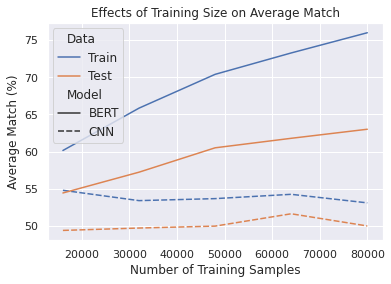

In [47]:
avg_match = train_var[['Number of Training Samples', 'Average Match', 'Model', 'Data']]

plt.title('Effects of Training Size on Average Match')
plt.ylabel("Average Match (%)")
sns_avg_plot = sns.lineplot(data=avg_match, x="Number of Training Samples", y="Average Match", hue="Data", style='Model');
sns_avg_plot.figure.savefig(filepath+'summary_sample_size_var_average_match.png')

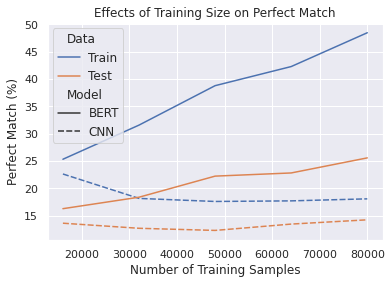

In [49]:
per_match = train_var[['Number of Training Samples', 'Perfect Match', 'Model', 'Data']]

plt.title('Effects of Training Size on Perfect Match')
plt.ylabel("Perfect Match (%)")
sns_perfect_plot = sns.lineplot(data=per_match, x="Number of Training Samples", y="Perfect Match", hue="Data", style='Model');
sns_perfect_plot.figure.savefig(filepath+'summary_sample_size_var_perfect_match.png')

#### Train

In [158]:
train_var_train = train_var[train_var['Data'] == 'Train']
train_var_train

,At Least 1 Match,At Least 2 Matches,At Least 3 Matches,Perfect Match,Average Match,Data,Number of Training Samples,Model
0,100,82,50,25,60,Train,16000,BERT
1,100,86,57,32,66,Train,32000,BERT
0,100,89,63,39,70,Train,48000,BERT
0,100,91,66,42,73,Train,64000,BERT
0,100,92,70,48,76,Train,80000,BERT
0,100,77,44,23,55,Train,16000,CNN
1,100,77,41,18,53,Train,32000,CNN
2,100,77,41,18,54,Train,48000,CNN
3,100,78,42,18,54,Train,64000,CNN
4,100,77,42,18,53,Train,80000,CNN


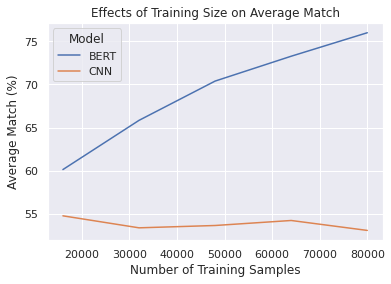

In [159]:
plt.title('Effects of Training Size on Average Match')
plt.ylabel("Average Match (%)")
sns.lineplot(data=train_var_train, x="Number of Training Samples", y="Average Match", hue="Model");

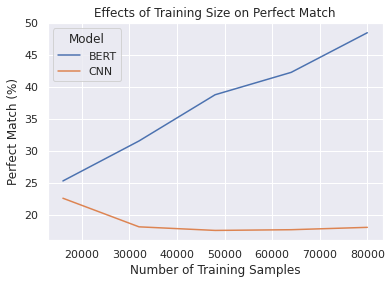

In [160]:
plt.title('Effects of Training Size on Perfect Match')
plt.ylabel("Perfect Match (%)")
sns.lineplot(data=train_var_train, x="Number of Training Samples", y="Perfect Match", hue="Model");

#### Test

In [161]:
train_var_test = train_var[train_var['Data'] == 'Test']
train_var_test

,At Least 1 Match,At Least 2 Matches,At Least 3 Matches,Perfect Match,Average Match,Data,Number of Training Samples,Model
0,100,79,43,16,54,Test,16000,BERT
1,100,81,46,18,57,Test,32000,BERT
1,100,83,50,22,60,Test,48000,BERT
1,100,84,51,23,62,Test,64000,BERT
1,100,85,53,26,63,Test,80000,BERT
0,100,74,37,14,49,Test,16000,CNN
1,100,74,36,13,50,Test,32000,CNN
2,100,75,36,12,50,Test,48000,CNN
3,100,77,38,13,52,Test,64000,CNN
4,100,74,37,14,50,Test,80000,CNN


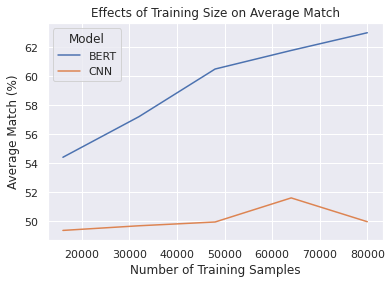

In [162]:
plt.title('Effects of Training Size on Average Match')
plt.ylabel("Average Match (%)")
sns.lineplot(data=train_var_test, x="Number of Training Samples", y="Average Match", hue="Model");

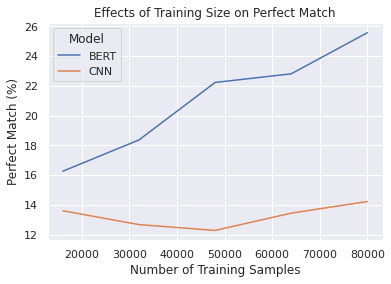

In [163]:
plt.title('Effects of Training Size on Perfect Match')
plt.ylabel("Perfect Match (%)")
sns.lineplot(data=train_var_test, x="Number of Training Samples", y="Perfect Match", hue="Model");